# Tutorial 1-1: Exploratory Data Analysis (EDA)

In [8]:
####################################################
# Python Program                                   #
#                                                  #
# Name: Joseph Forde                               #
# Student ID Number: 24514128                      #
# CS5062 – Data Analytics                          #
#E-tivity 1                                        #
# Task 1: Exploratory Data Analysis (EDA)          #
# Task 2: Data Preparation                         #
# Date 03-05-2024                                  #
####################################################

Python Version been used

In [9]:
!python --version

Python 3.11.11


Installing Kaggle on local system

In [10]:
#Install kaggle
!pip -q install kaggle



Library Imports:

import pandas as pd: Imports the pandas library, a powerful tool for data manipulation and analysis.

import matplotlib.pyplot as plt: Imports the pyplot interface of matplotlib, which is used for making 2D plots from data in arrays.

import seaborn as sns: Imports the seaborn library, a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.

import numpy as np: Imports the numpy library, essential for scientific computing with Python. It supports large, multi-dimensional arrays and matrices, along with a broad collection of mathematical functions to operate on these arrays.

import os: Imports the os module, which provides a way of using operating system dependent functionality like reading or writing to the file system.

import zipfile: Imports the zipfile module, which allows you to work with ZIP archives, letting you extract, archive, or even directly access files within them.


This tutorial demonstrates EDA of a dataset with the Python modules `Pandas`, `Numpy`, `Matplotib` and `Seaborn`.

> *"At a high level, EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results."*
> <a href="https://www.svds.com/value-exploratory-data-analysis/">Chloe Mawer</a>

## A. Importing Modules and Dataset

In [11]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing the modules, the next step is to load the dataset into a Pandas dataframe.
Dataframe is the term used in Pandas for two-dimensional arrays.

In this tutorial, we use the example dataset loans_train.csv available as a CSV file.
The file loans_train.csv is expected to be in the same directory as this notebook.

In [12]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
df = pd.read_csv('/content/gdrive/MyDrive/UL/bank.csv')
# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

A concise summary of your DataFrame, which includes data types and counts of non-null values for each column

In [14]:
df.info()
#A concise summary of the DataFrame, including the dtypes and non-null values count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [15]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [16]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


We can see that the dataset has 614 data rows, and both numerical and categorical attributes. The data rows are typically called *observations* or *examples*, and the columns are also called *attributes* or *features*.

The last attribute `Loan_Status` indicates whether a loan was granted (Y) or not (N). This attribute would be a primary candidate for an attribute to *learn* to predict from the values of the other attributes. Before building a predictive model, though, the first step is to get to know the dataset better (the goal of this exercise) and prepare it for machine learning (the goal of the next exercise).

#### B.1. Quick Examination of Numerical Attributes

In [17]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


There are a few inferences we can draw by looking at the output of `describe()`:

- `LoanAmount` has (614 – 592) 22 missing values.
- `Loan_Amount_Term` has (614 – 600) 14 missing values.
- `Credit_History` has (614 – 564) 50 missing values.

Note that `Credit_History` is rather a categorical attribute despite having numerical values. We can see that about 84% of the applicants have a credit history. How? `Credit_History` has value 1 for those who have a credit history, and 0 otherwise. The mean of `Credit_History` is 0.84, i.e. 84% of the applicants have a credit history.

Please note that we can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

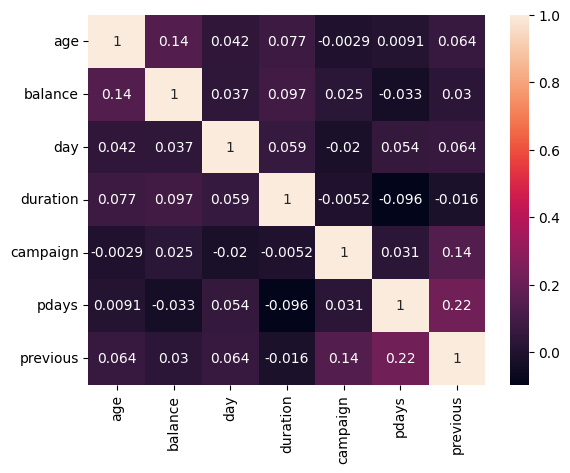

In [30]:
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical features
sns.heatmap(numerical_df.corr(), annot=True);

The heat map suggests correlation greater than 0 between `LoanAmount` and the three attributes `ApplicantIncome`, `CoapplicantIncome` and `Loan_Amount_Term`. Although, the most significant correlation is between `LoanAmount` and `ApplicantIncome`. That is, applicants with low income tend to request lower loan amounts than applicants with higher income according to the examples in the dataset.

We can further examine the pairwise distribution between `LoanAmount`, `ApplicantIncome`, `CoapplicantIncome` and `Loan_Amount_Term` a **pair plot**.

In [41]:
# note that by applying the method dropna() we drop all rows with missing values
sns.pairplot(data=df[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']].dropna())
plt.show()

KeyError: "None of [Index(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',\n       'Loan_Amount_Term'],\n      dtype='object')] are in the [columns]"

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

#### B.2. Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes (e.g. `Property_Area`, `Gender`, `Education`, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

`dfname['column_name']` is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute `Gender` the frequency table can be printed by the command:

In [21]:
#df['Gender'].value_counts()

KeyError: 'Gender'

In [32]:
# Try using df.columns to see all column names
print(df.columns)

# If 'Gender' is not present, check for similar column names
# and replace 'Gender' in your code with the correct name.

# For example, if the column is named 'gender', use:
# df['gender'].value_counts()

# If the column is truly missing and you expect it to be there,
# double-check the data loading process.
# Make sure the correct file is being loaded and the data is properly parsed.

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')


We can see that the number of males in the dataset is more than three times larger than the number of females. We can also check the total count of values in column `Gender` with the command:

In [ ]:
#df['Gender'].count()

That is, there are 13 missing values in column `Gender`.

## C. Distribution Analysis for Numerical Atributes

Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes.

Let's take, for example, the numerical attributes `ApplicantIncome` and `LoanAmount`.

In [22]:
# Let's start by plotting a histogram of ApplicantIncome using the command:

df['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Number of Applicants')
plt.show()

KeyError: 'ApplicantIncome'

In [34]:
# Let's start by plotting a histogram of ApplicantIncome using the command:
# Check for potential errors:
print(df.columns) # Print columns to verify their names
# Proceed if column exists with correct name:
if 'ApplicantIncome' in df.columns:
    df['ApplicantIncome'].hist(bins=50)
    plt.xlabel('Applicant Income')
    plt.ylabel('Number of Applicants')
    plt.show()
else:
    print("Column 'ApplicantIncome' not found in DataFrame.")
    # If column name is different in the dataset,
    # replace 'ApplicantIncome' with the actual name.
    # Example: If the column is named 'applicant_income', use df['applicant_income']

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')
Column 'ApplicantIncome' not found in DataFrame.


In the histogram above, we observe that there are few extreme values of `ApplicantIncome`. The use of 50 bins allows to depict the distribution clearly.

Next, we look at boxp lots to understand the distribution better.

KeyError: "None of [Index(['ApplicantIncome'], dtype='object')] are in the [columns]"

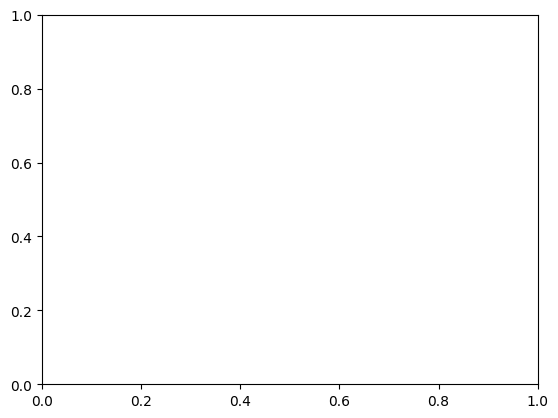

In [23]:
df.boxplot(column='ApplicantIncome')
plt.show()

KeyError: "None of [Index(['ApplicantIncome'], dtype='object')] are in the [columns]"

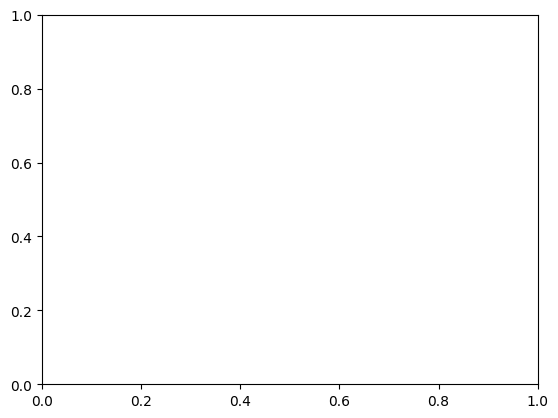

In [35]:
df.boxplot(column='ApplicantIncome')

KeyError: "None of [Index(['applicantincome'], dtype='object')] are in the [columns]"

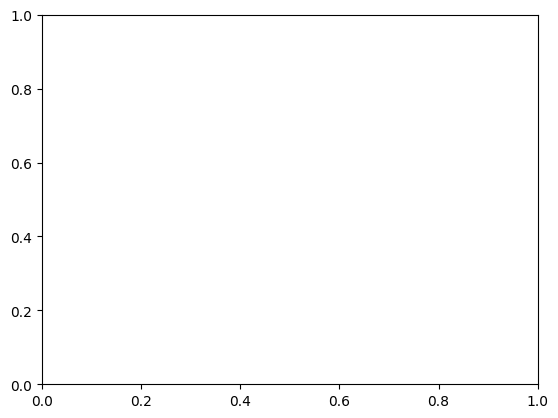

In [36]:
# Replace 'ApplicantIncome' with the actual column name in your dataframe.
# Based on your previous code and the error message, it's likely that
# the column name is either misspelled or has a different case.
# For example, if the column is named 'applicantincome' or 'Applicant_Income',
# use that instead.

# Assuming the actual column name is 'applicantincome':
df.boxplot(column='applicantincome')
plt.show()

The box plot above confirms the presence of a lot of outliers/extreme values. This may be attributed to the income disparity in the society. Part of this can be due to the fact that we are looking at people with different education levels. Let us segregate them by `Education`.

In [24]:
# Boxp lots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='ApplicantIncome', by='Education')
plt.title('Box plot of ApplicantIncome grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

KeyError: 'Education'

We can see that there is no substantial difference between the mean income of graduates and non-graduates. But there are a higher number of graduates with very high incomes.

In [37]:
# Next, we examine a histogram of the numerical attribute loanAmount

df['LoanAmount'].hist(bins=50)
plt.xlabel("Loan Amount")
plt.ylabel('Number of Applicants')
plt.show()

KeyError: 'LoanAmount'

In [39]:
# Next, we examine a histogram of the numerical attribute loanAmount
# Check for potential errors:
print(df.columns) # Print columns to verify their names
# Proceed if column exists with correct name:
if 'LoanAmount' in df.columns:
    df['LoanAmount'].hist(bins=50)
    plt.xlabel("Loan Amount")
    plt.ylabel('Number of Applicants')
    plt.show()
else:
    print("Column 'LoanAmount' not found in DataFrame.")
    # If column name is different in the dataset,
    # replace 'LoanAmount' with the actual name.
    # Example: If the column is named 'loan_amount', use df['loan_amount']

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')
Column 'LoanAmount' not found in DataFrame.


KeyError: "None of [Index(['LoanAmount'], dtype='object')] are in the [columns]"

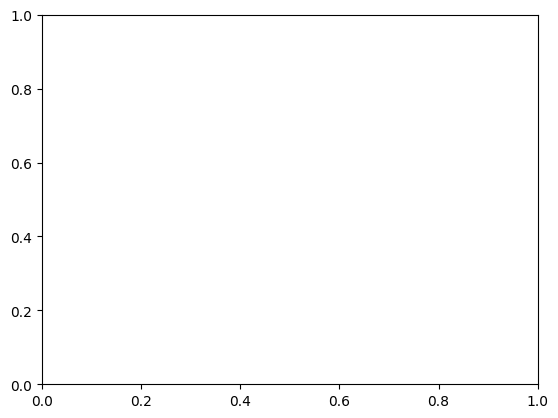

In [26]:
# Boxp lot of LoanAmount
df.boxplot(column='LoanAmount')
plt.show()

Again, there are some extreme values. Clearly, both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing values as well as many extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. We will take this up in the next tutorial.

Finally, let's examine the relationship between `ApplicantIncome` and `LoanAmount` with a scatter plot.

KeyError: 'ApplicantIncome'

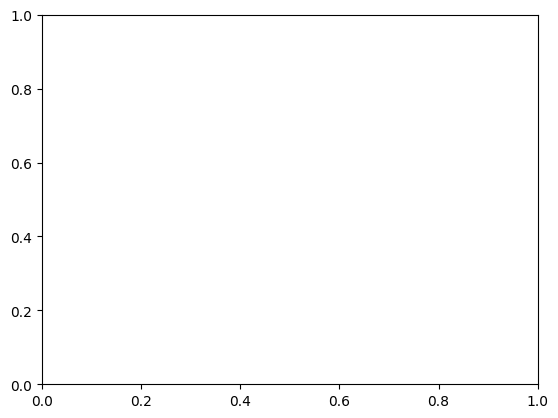

In [28]:
df.plot.scatter(x='ApplicantIncome', y='LoanAmount')
plt.show()

Based on this scatter plot we can say that LoanAmount probably tends to grow linearly as ApplicantIncome grows. We can see the trend clearer with `Seaborn's regplot`, which draws a line that best fits the relation between two numeric attributes.

In [27]:
sns.regplot(data=df, x='ApplicantIncome', y='LoanAmount')
plt.show()

KeyError: 'ApplicantIncome'

This regplot suggests that typically LoanAmount is 100 times lower than ApplicantIncome.

## D. Box Plot Variations

Next, we will use the `Seaborn` module to demonstrate a few variations or alternatives to box plots.

In [ ]:
#First, let's draw a seaborn-style box plot for LoanAmount

sns.boxplot(x=df['LoanAmount'], orient='v', width=0.2)
plt.show()

In [ ]:
#Violin plot for LoanAmount

sns.violinplot(x=df['LoanAmount'], orient='v', width=0.5)
plt.show()

In [ ]:
#Strip plot for LoanAmount

sns.stripplot(x=df['LoanAmount'], jitter=True, orient='v')
plt.show()

In [ ]:
#Swar mplot for LoanAmount

sns.swarmplot(x=df['LoanAmount'], orient='v')
plt.show()

Let's redraw the box plots of `ApplicantIncome` grouped by the categorical attribute `Education` as violin plots.

In [ ]:
sns.violinplot(data=df, x='Education', y='ApplicantIncome')
plt.show()

We can split each violin plot by a binary attribute. For example, we can add `Gender` to the plot above as follows.

In [ ]:
sns.violinplot(data=df, x='Education', y='ApplicantIncome', hue='Gender', split=True)
plt.show()

The plot above suggest that male graduates in our dataset have more even distribution of income than female graduates, while the opposite is true for applicants who are not graduates.

## E. Distribution Analysis for Categorical Attributes

As noted above `Credit_History` is rather a categorical attribute with two categories/values:
- 0 - the applicant has no credic history
- 1 - the applicant has a credit history

Let's look at the chances of getting a loan based on credit history. That is, let's examine the relation between atributes `Credit_History` and `Loan_Status`.

First, let's take a look at the frequency table for attribute `Credit_History`:

In [ ]:
frequency_table = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:')
print(frequency_table)

Next, build a pivot table for `Loan_Status` and `Credit_History`, i.e. find the mean `Loan_Status` for both `Credit_History`=0 and `Credit_History`=1.

In [ ]:
pivot_table_LC = df.pivot_table(values='Loan_Status',
                                index='Credit_History',
                                aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

Here the values of `Loan_Status` are grouped by the index `Credit_History`, and the aggfunc is applied to each group. In the example above aggfunc is `mean()`, assuming the Y and N values in column `Loan_Status` are replaced by 1s and 0s, respectively.

In [ ]:
# Print pivot table
print(pivot_table_LC)

The pivot table can be interprted as follows. The probability for getting a loan is 0.078652 (i.e. ~8%) for applicants with no credit history, and 0.795789 (i.e. ~80%) for applicants with a credit history.

Let's plot `Credit_History` and the probability of getting a loan based on `Credit_History`.

In [ ]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Credit History')
plt.show()

In [ ]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Credit History')
plt.legend().set_visible(False) # we don't need the default legend

Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' `crosstab()` function:

In [ ]:
crosstab_CL = pd.crosstab(df['Credit_History'], df['Loan_Status'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

Furthermore, we can stackchart `Credit_History` and `Gender` against `Loan_Status`.

In [ ]:
crosstab_CGL = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

The plot above suggests that gender does not play a significant role when taking a decision for granting a loan. However, it is hard to say which gender is more likely to have a loan granted when `Credit_History`=1, for example. To see this clearer, we can build a pivot table with the mean values of `Loan_Status` for each combination of values of `Credit_History` and `Gender` and then visualise this pivot table as a heat map.

In [ ]:
pivot_table_LCG = df.pivot_table(values='Loan_Status',
                           index='Credit_History',
                           columns='Gender',
                           aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

We can see now that a male with credit history is slightly more likely to have their loan granted than a female with credit history 1. However, we should not rush to make strong conclusions from this observation yet, because we have not examined how the numerical attributes (e.g., `LoanAmmount` and `ApplicantIncome`) relate to `Gender` and `Loan_Status`.